In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../data/heart.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [39]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0
6,62,0,3,140,268,0,2,160,0,3.6,2,2,1,1
7,57,0,3,120,354,0,0,163,1,0.6,0,0,1,0
8,63,1,3,130,254,0,2,147,0,1.4,1,1,3,1
9,53,1,3,140,203,1,2,155,1,3.1,2,0,3,1


In [40]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values

In [41]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
cat_col = [col for col in df.columns if df[col].nunique() < 10 and col != 'target']
num_col = [col for col in df.columns if col not in cat_col + ['target']]

print(cat_col)
print(num_col)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


Checking Feature Distribution

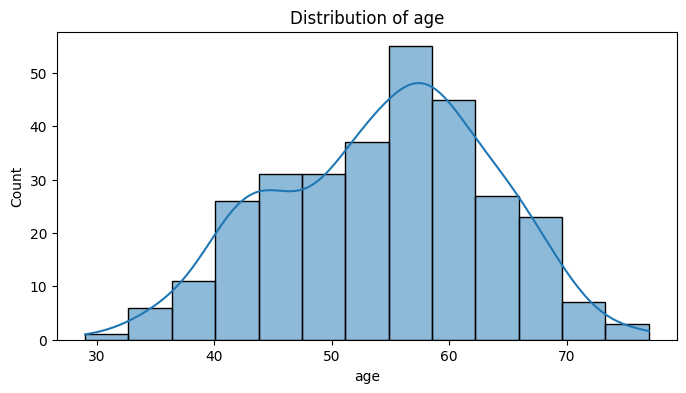

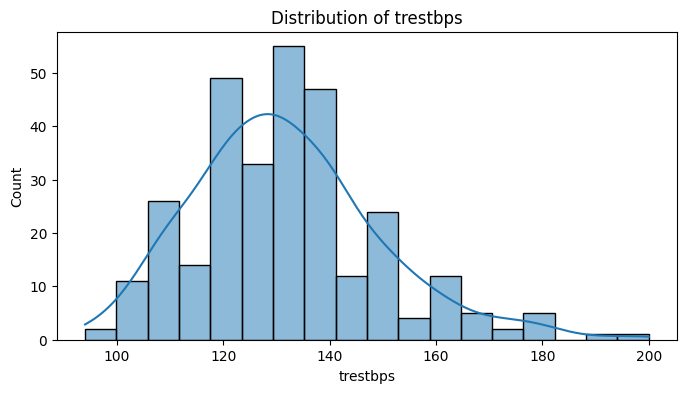

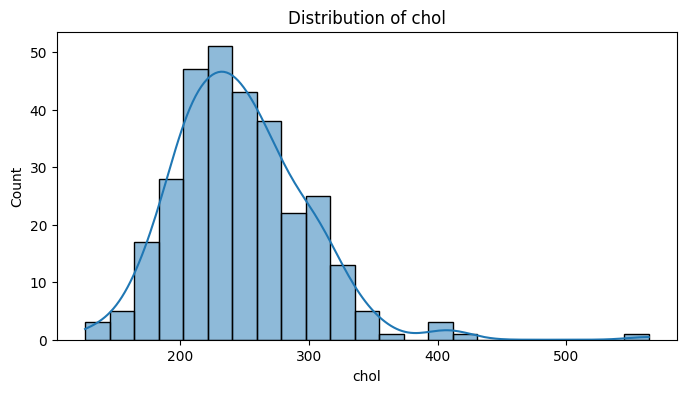

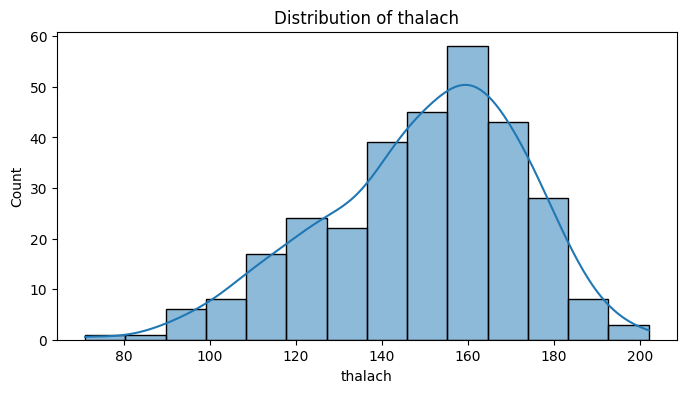

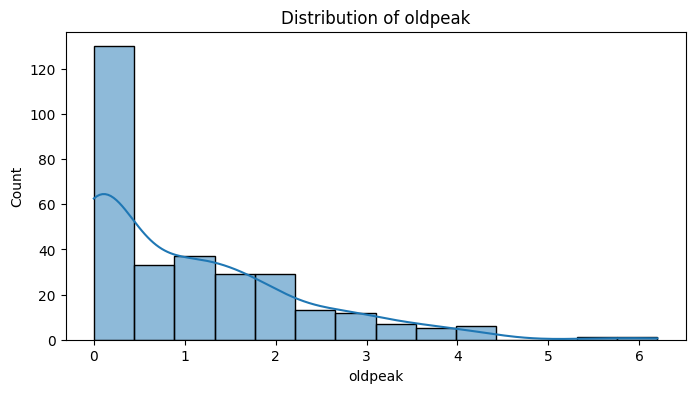

In [44]:
#For numeric cols
for col in num_col:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [45]:
df[num_col].skew()

age        -0.209060
trestbps    0.706035
chol        1.135503
thalach    -0.537449
oldpeak     1.269720
dtype: float64

Observation:
1. chol is highly right skewed
2. oldpeak is highly right skewed
3. trestbps is moderately right-skewed
4. thalach is moderately left-skewed
5. age is approximately normal(no changes needed)

In [46]:
df['chol_log'] = np.log1p(df['chol'])
df['oldpeak_log'] = np.log1p(df['oldpeak'])
df['trestbps_log'] = np.log1p(df['trestbps'])
df['thalach_sq'] = df['thalach'] ** 2

print("Skewness after transformation:")
print("chol_log:", df['chol_log'].skew())
print("oldpeak_log:", df['oldpeak_log'].skew())
print("trestbps_log:", df['trestbps_log'].skew())
print("thalach_sq:", df['thalach_sq'].skew())


Skewness after transformation:
chol_log: 0.08173322059816669
oldpeak_log: 0.3968250668345526
trestbps_log: 0.28193999811726517
thalach_sq: -0.15759419540045047


In [47]:
df.drop(columns=['chol', 'oldpeak', 'trestbps', 'thalach'],axis=1, inplace=True)

In [48]:
df.columns

Index(['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
       'target', 'chol_log', 'oldpeak_log', 'trestbps_log', 'thalach_sq'],
      dtype='object')

One-Hot-Encoding for categorical features

In [49]:
df = pd.get_dummies(df, columns=cat_col, drop_first=True)

Multi-varient Analysis

In [50]:
# Numerical features
num_cols = ['age', 'chol_log', 'oldpeak_log', 'trestbps_log', 'thalach_sq']

# Categorical features (already one-hot encoded)
cat_cols = ['sex_1', 'cp_1', 'cp_2', 'cp_3',
            'restecg_1', 'restecg_2', 'exang_1',
            'slope_1', 'slope_2',
            'ca_1', 'ca_2', 'ca_3',
            'thal_2', 'thal_3']

# Target
target_col = 'target'


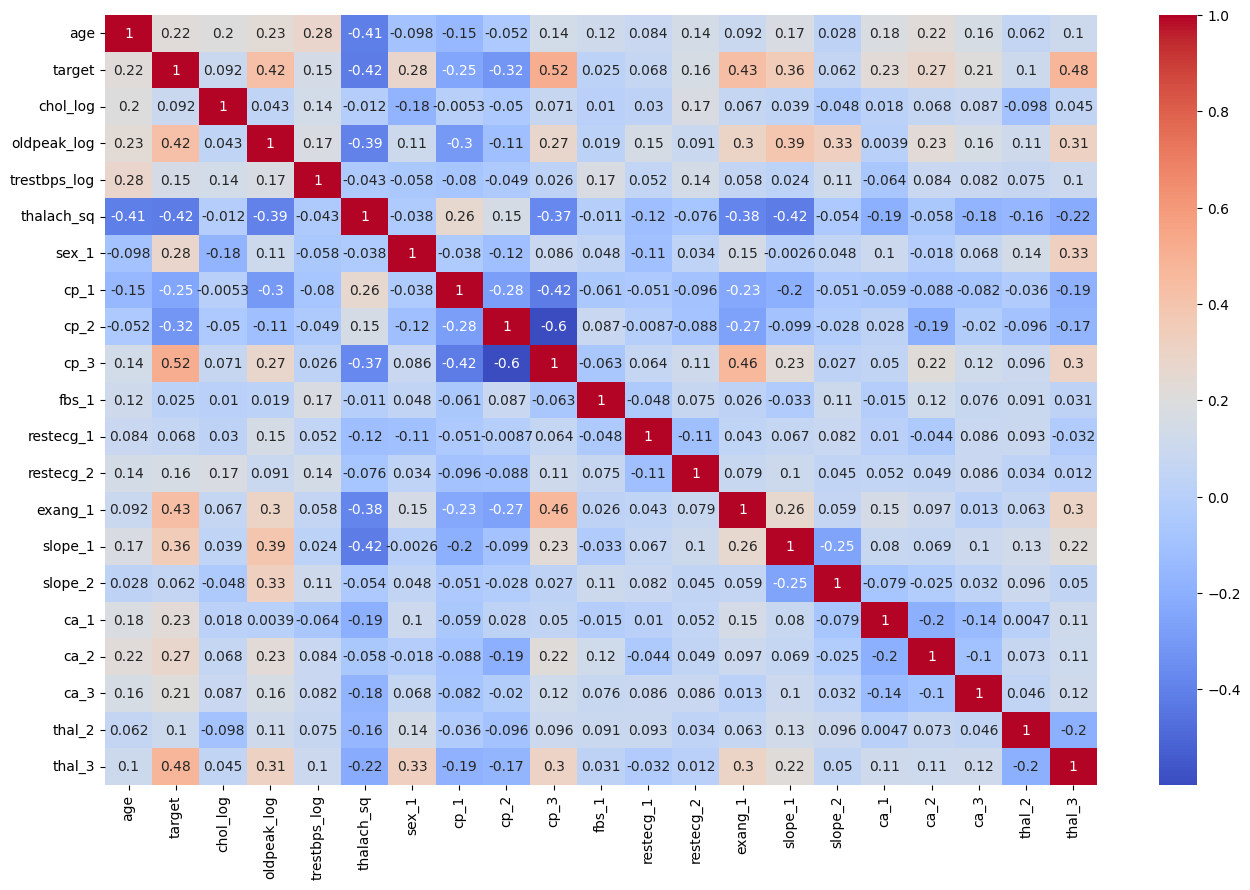

In [51]:
plt.figure(figsize=(16,10))
corr_df = df.corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.show()

In [52]:
print(df.columns)

Index(['age', 'target', 'chol_log', 'oldpeak_log', 'trestbps_log',
       'thalach_sq', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1',
       'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3',
       'thal_2', 'thal_3'],
      dtype='object')


In [53]:
df.to_csv('../data/Final_heart_dataset.csv')

In [54]:
final_features = ['age', 'chol_log', 'oldpeak_log', 'trestbps_log',
 'thalach_sq', 'sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1',
 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3',
 'thal_2', 'thal_3']



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df[final_features]
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2, stratify=Y)

scalar = StandardScaler()
X_train_Scaled = scalar.fit_transform(X_train)
X_test_Scaled = scalar.fit_transform(X_test)

# model = LogisticRegression(max_iter=1000)
# model.fit(X_train_Scaled, Y_train)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Accuracy: ",accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy:  0.9016393442622951
[[28  5]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.84      0.96      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61



Random Forest Classifier provides better Accuracy and f1-score when compared to Logistic Regression